In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap # to change color of the corr map

In [2]:
base_path = os.getcwd() 
file_name = "data/full_data.csv"
full_path = os.path.join(base_path, file_name)

data = pd.read_csv(full_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Clean data

In [3]:
# clean data
df = data.drop(['id', 'Unnamed: 32'],axis = 1 )
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# check if data is balanced
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
0    357
1    212
Name: count, dtype: int64


In [5]:
y = df.diagnosis                          # M or B 
x = df.drop('diagnosis',axis = 1 )
print(x.shape)
print(y.shape)

(569, 30)
(569,)


Distribution of the data for ONLY for mean variables

(we can do for all 30 variables but it takes too much space :(( )

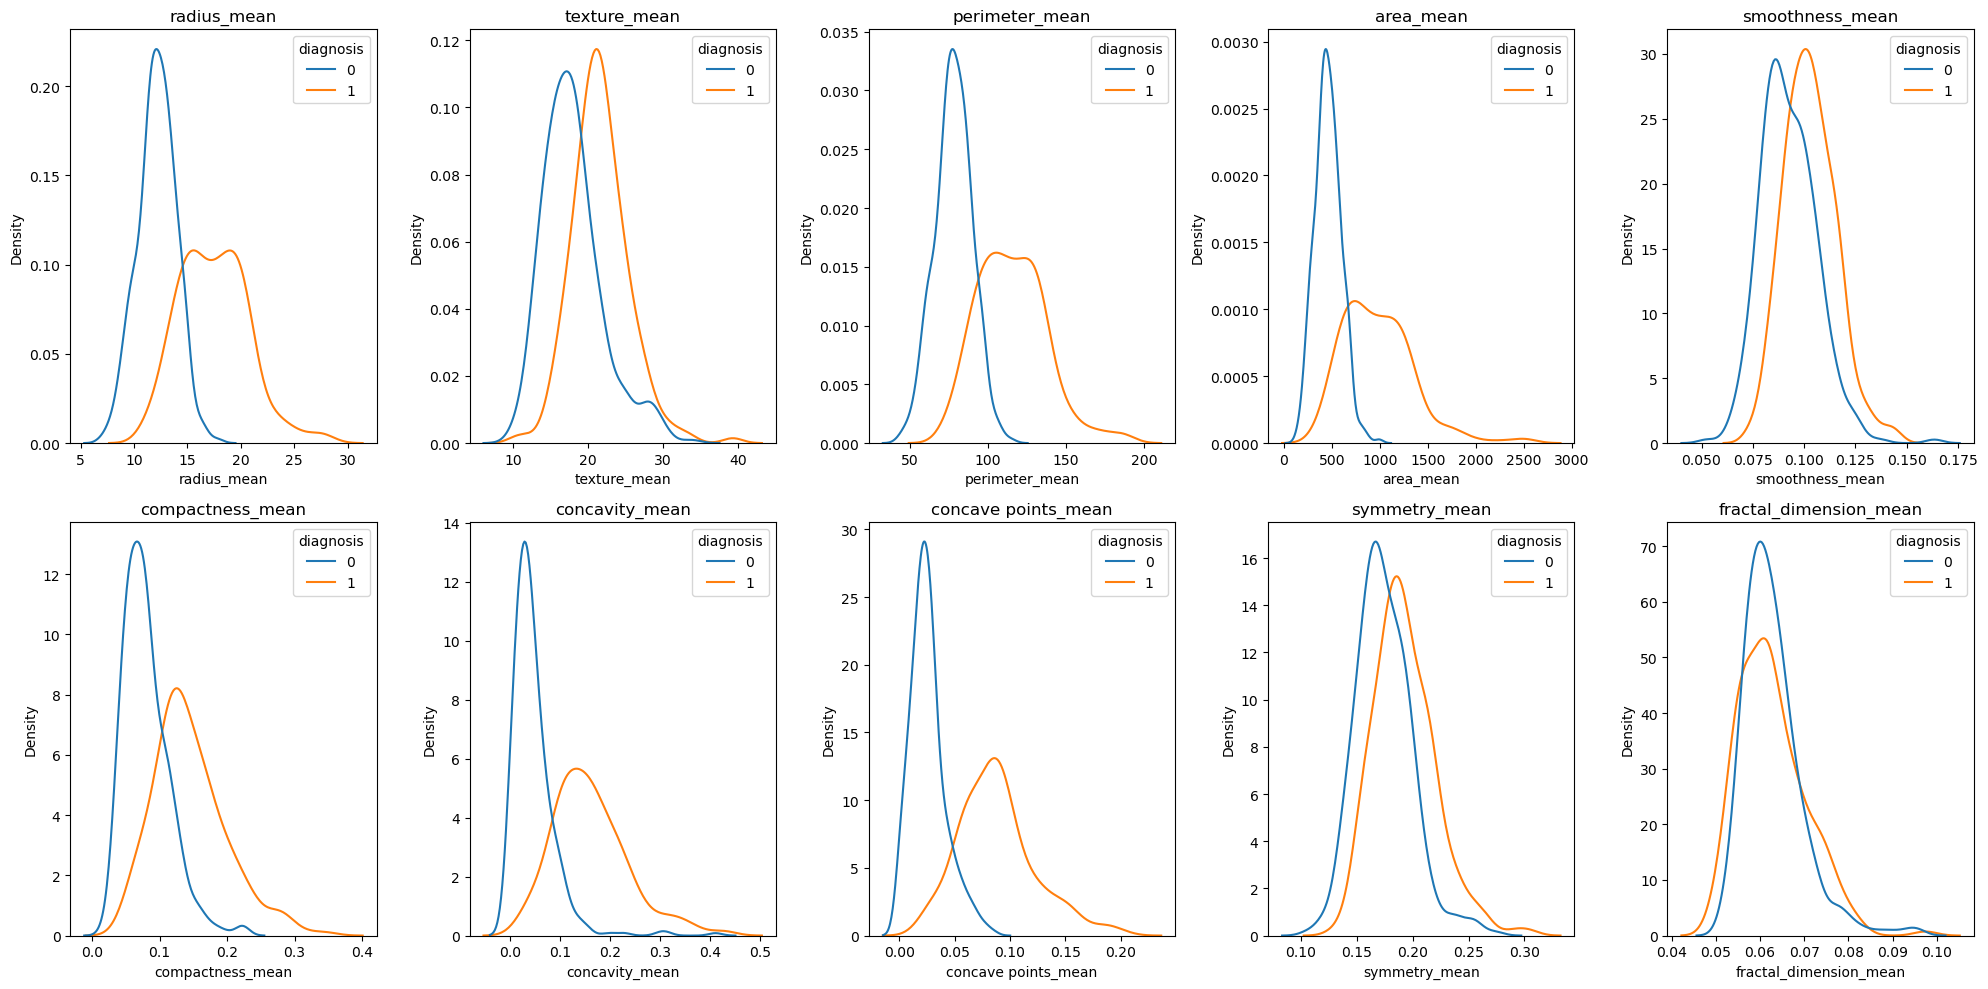

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(x.columns[:10]):
    sns.kdeplot(data=df, x=col, hue='diagnosis', ax=axes[i], common_norm=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

We can try different techniques for feature selection

1) Correlation matrix

2) Univariate feature selection (ANOVA)

3) Frecursive feature eleination (?)

4) PCA

2) Univariate feature selection ANOVA

In [23]:
scaler = StandardScaler()     # scale before using anova
X_scaled = scaler.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)

# univariate analysis and return f-scores and p-values
def univariate_analysis(X, y, features):
    selector = SelectKBest(score_func=f_classif, k='all')
    selector.fit_transform(X[features], y)
    scores = selector.scores_
    p_values = selector.pvalues_
    return scores, p_values

# mean
features_mean = X_scaled_df.columns[:10]
scores_1, p_values_1 = univariate_analysis(X_scaled_df, y, features_mean)

# se
features_sd = X_scaled_df.columns[10:20]
scores_2, p_values_2 = univariate_analysis(X_scaled_df, y, features_sd)

# Third set of features
features_worst = X_scaled_df.columns[20:]
scores_3, p_values_3 = univariate_analysis(X_scaled_df, y, features_worst)

print("p_values for mean:")
print(p_values_1)

print("p_values for SE:")
print(p_values_2)

print("p_values for worst:")
print(p_values_3)


p_values for mean:
[8.46594057e-096 4.05863605e-025 8.43625104e-101 4.73456431e-088
 1.05185036e-018 3.93826311e-056 9.96655576e-084 7.10115016e-116
 5.73338403e-016 7.59936804e-001]
p_values for SE:
[9.73894866e-50 8.43332029e-01 1.65190518e-47 5.89552139e-46
 1.10296609e-01 9.97599465e-13 8.26017617e-10 3.07230877e-24
 8.76641818e-01 6.30735508e-02]
p_values for worst:
[8.48229192e-116 1.07805749e-030 5.77139714e-119 2.82884770e-097
 6.57514363e-026 7.06981635e-055 2.46466396e-072 1.96909971e-124
 2.95112058e-025 2.31643245e-015]


Now we can plot variables that have non-significant p-value, so their mean is very similar to mean of other group/s

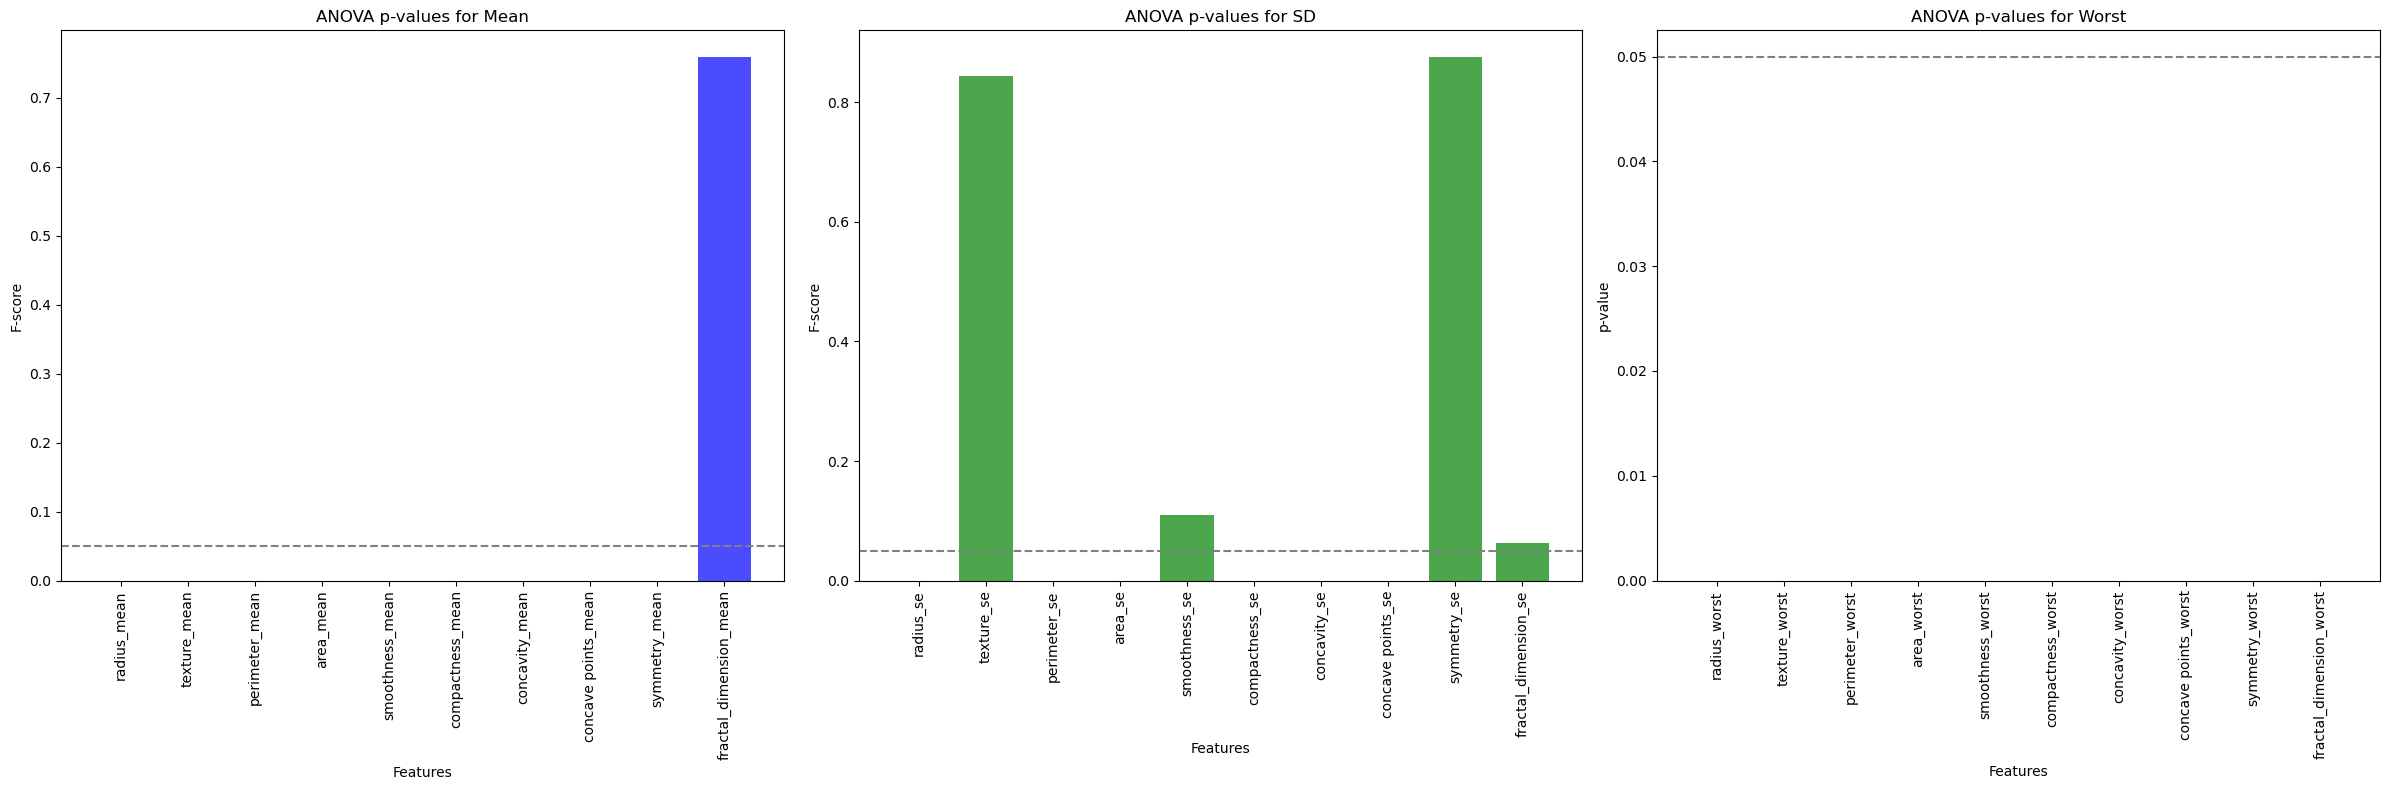

In [26]:
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Bar plot for the first set of features
axes[0].bar(features_mean, p_values_1, color='blue', alpha=0.7)
axes[0].axhline(y=0.05, color='gray', linestyle='--')
axes[0].set_title('ANOVA p-values for Mean')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('F-score')
axes[0].set_xticklabels(features_mean, rotation=90)

# Bar plot for the second set of features
axes[1].bar(features_sd, p_values_2, color='green', alpha=0.7)
axes[1].axhline(y=0.05, color='gray', linestyle='--')
axes[1].set_title('ANOVA p-values for SD')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('F-score')
axes[1].set_xticklabels(features_sd, rotation=90)

# Bar plot for the third set of features
axes[2].bar(features_worst, p_values_3, color='red', alpha=0.7)
axes[2].axhline(y=0.05, color='gray', linestyle='--')
axes[2].set_title('ANOVA p-values for Worst')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('p-value')
axes[2].set_xticklabels(features_worst, rotation=90)

plt.tight_layout()
plt.show()

### Correlation maps

c:\Users\Administrator\anaconda3\envs\NN\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


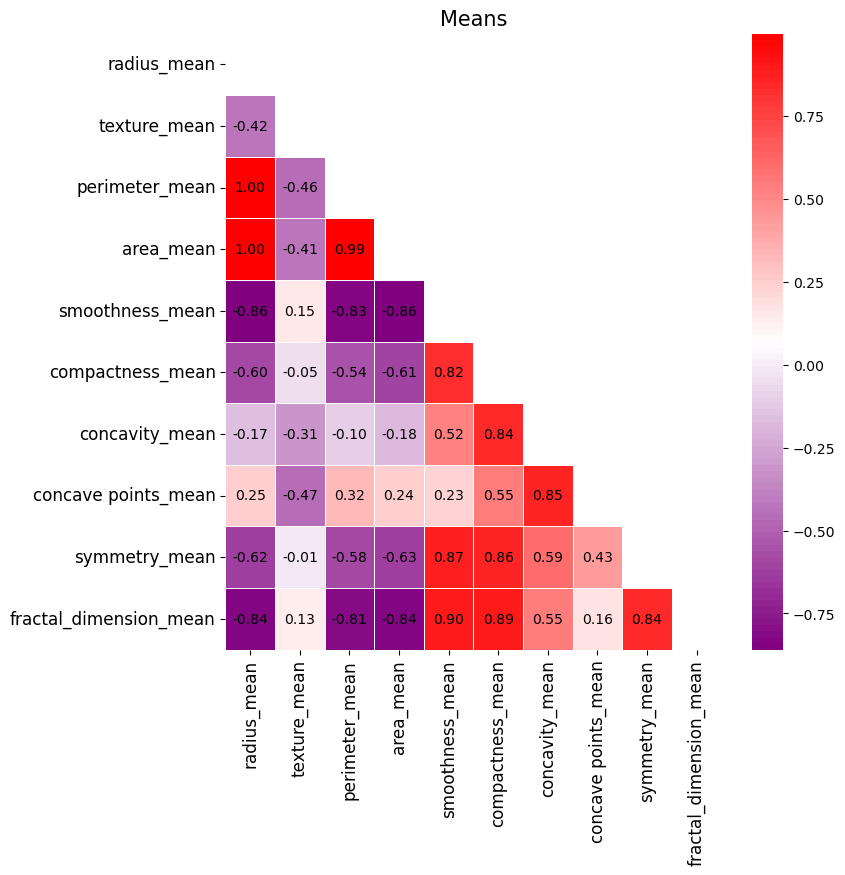

c:\Users\Administrator\anaconda3\envs\NN\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


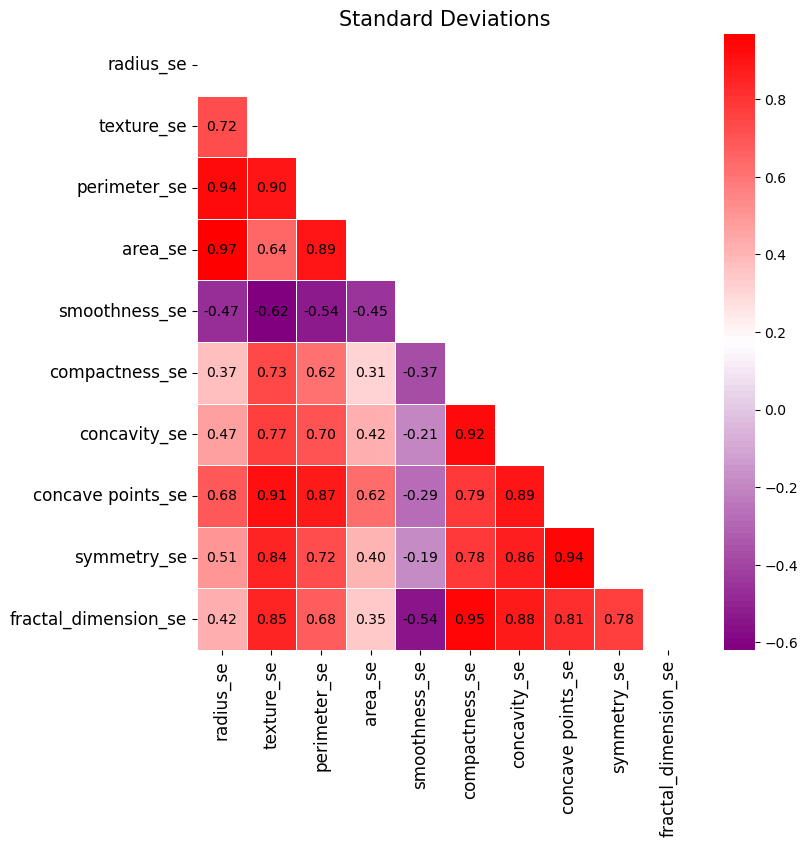

c:\Users\Administrator\anaconda3\envs\NN\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


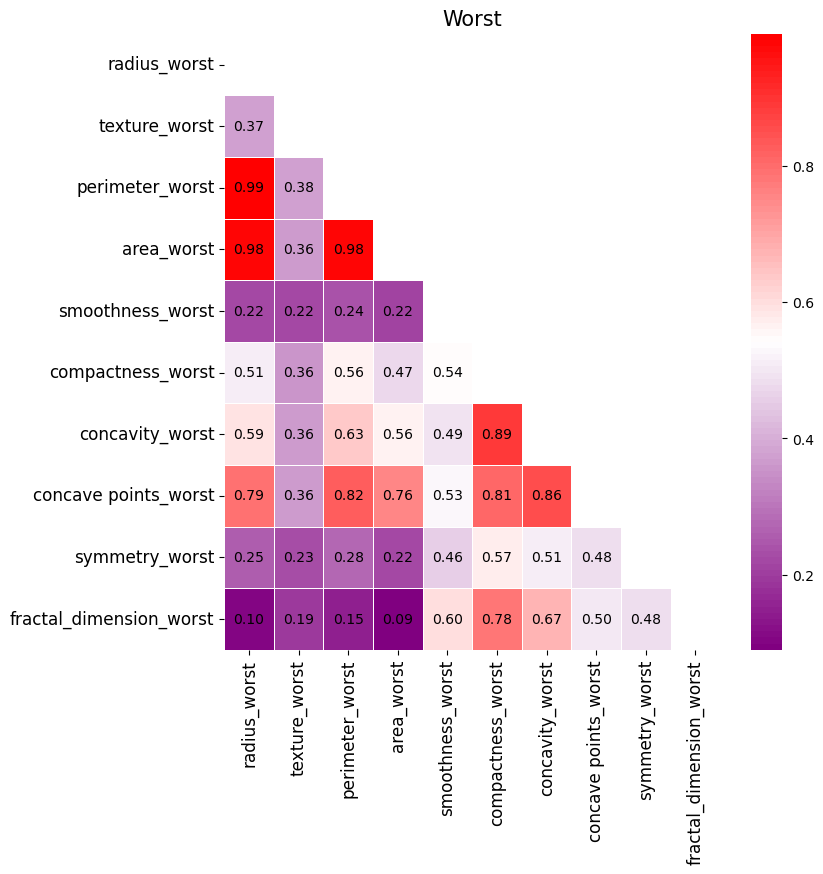

In [7]:
# CORRELATION MATRIX
def correlation_matrix(x, y, title, cmap="coolwarm", label_fontsize=12, title_fontsize=14):
    data = pd.concat([x, y], axis=1)
    corr_matrix = data.corr().drop(labels='diagnosis', axis=0).drop(labels='diagnosis', axis=1)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    _, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr_matrix, mask=mask, linewidths=.5, ax=ax, cmap=cmap, annot=True, fmt='.2f')

    # responsible for the font sizes
    ax.tick_params(axis='both', which='major', labelsize=label_fontsize)
    plt.title(title, fontsize=title_fontsize)

    # adding annotations manually if needed
    for i in range(corr_matrix.shape[0]):
        for j in range(i):
            plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

    plt.show()


colors = ["purple", "white", "red"]
n_bins = 100
cmap_name = 'purple_white_red'

# creates the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

correlation_matrix(x.iloc[0:10, 0:10], y[0:10], 'Means', cmap=cm, label_fontsize=12.1, title_fontsize=15)
correlation_matrix(x.iloc[10:20, 10:20], y[10:20], 'Standard Deviations', cmap=cm, label_fontsize=12.1, title_fontsize=15)
correlation_matrix(x.iloc[20::, 20::], y[20::], 'Worst', cmap=cm, label_fontsize=12.1, title_fontsize=15)